In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from datetime import timedelta

import ast

In [2]:
file_path = '/projectnb/peaclab-mon/boztop/resource-allocation/datasets/sandia/may-october-2024-scorecard.csv_anom'

df = pd.read_csv(file_path)
df.columns


,Start,Elapsed,User,JobName,WorkDir,State,Elapsed.1,NNodes,max_cpu_node_usage,mean_cpu_node_usage,max_mem_usage,mean_mem_usage,Cluster
0,1714558014,00:43:09,4cb2859926b7e9e2ec73d41fe61d1f6c60ac56316f7964...,933294ca1fe565a6ecf5523fe80129d8482d3d0054f210...,564ccfaebbdadb8f46f7de613ecbff7d3c6aaafd455984...,COMPLETED,00:43:09,1,8.007334,2.317697,246688.0,2.227100e+05,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...
1,1714563918,00:50:24,4cb2859926b7e9e2ec73d41fe61d1f6c60ac56316f7964...,5c67afb5a59bb7292bac792d872735f2e06c4031383266...,f39f71bec472d4d3f1f5c4aa1824214de38e2a9da48b42...,COMPLETED,00:50:24,1,19.191500,3.080427,337880.0,2.601945e+05,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...
2,1714566033,01:27:06,d7556dc042c9c0fdc66ce39a15be99fc155e5f5603a8c7...,ea8ec98da8937611ad7bb4fe32e8f41fc4bd44305705fa...,53fd196e7754acd349448f4bd7716361f007f1dc1ffc81...,COMPLETED,01:27:06,1,27.079916,4.638708,471800.0,3.453473e+05,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...
3,1714572549,00:07:15,152fdc41299c45745f35c56b14c1934807e06d1df03f42...,bb609da3da7af99d15a4b235de7577e56e6fd2041e12a3...,13eab0f3d1c5c82631c18d0d9604788cfe847c6ec69b05...,COMPLETED,00:07:15,2,111.659332,71.761688,2010920.0,1.184977e+06,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...
4,1714572596,00:07:13,152fdc41299c45745f35c56b14c1934807e06d1df03f42...,bb609da3da7af99d15a4b235de7577e56e6fd2041e12a3...,13eab0f3d1c5c82631c18d0d9604788cfe847c6ec69b05...,COMPLETED,00:07:13,2,111.615334,71.386131,2637336.0,1.167830e+06,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313610,1727071706,09:14:26,07b281a5bc0692848ad094be3270ccbdb3235166ca6cec...,e0f0c4d07870e74ae84dcd63c63d0790abbeb552aacfcc...,9a7acc3858e86f43da21a5e595f61a95a1c753f8a2b432...,COMPLETED,09:14:26,16,15.996037,15.993864,6038404.0,5.454012e+06,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...
313611,1727071946,09:12:48,07b281a5bc0692848ad094be3270ccbdb3235166ca6cec...,651d6f601d19a0d583c3d8cf13e9562f5552fddcabbc69...,17dfc4b83b553842f5a666c3022eae9c6d0e01b31dad47...,COMPLETED,09:12:48,16,15.996250,15.993896,6073152.0,5.428606e+06,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...
313612,1727074591,09:10:37,07b281a5bc0692848ad094be3270ccbdb3235166ca6cec...,57c5c79bd3881ae0992dc411a5e97b72cd18d98ac5415d...,4d332984008fe6d0bf9145b7693165af96b7f4c38cbf9d...,COMPLETED,09:10:37,16,15.996250,15.994133,5523404.0,5.417236e+06,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...
313613,1727075192,09:11:11,07b281a5bc0692848ad094be3270ccbdb3235166ca6cec...,f64746e3cb367d7cefbbcaa17b375e5cef009790d9a034...,6b3324555a660b7211ae1acfae9770e020a699c04eddc2...,COMPLETED,09:11:11,16,15.996130,15.993800,6157676.0,5.397960e+06,e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b93...


In [4]:
# --- LET'S MAKE SOME OBSERVATIONS! ---
print(f"Total number of jobs in the dataset: {df.shape[0]}")

print(f"Number of unique users: {df['User'].nunique()}")
      
print(f"Number of unique job names: {df['JobName'].nunique()}")
      
print(f"Number of unique working directories: {df['WorkDir'].nunique()}")  
      
print(f"Number of unique clusters: {df['Cluster'].nunique()}")  



Total number of jobs in the dataset: 313615
Number of unique users: 614
Number of unique job names: 99903
Number of unique working directories: 180937
Number of unique clusters: 1
Success and failure of jobs:
COMPLETED    313615
Name: State, dtype: int64


/project/peaclab-mon/monitoring_venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Total number of jobs >500: 98443


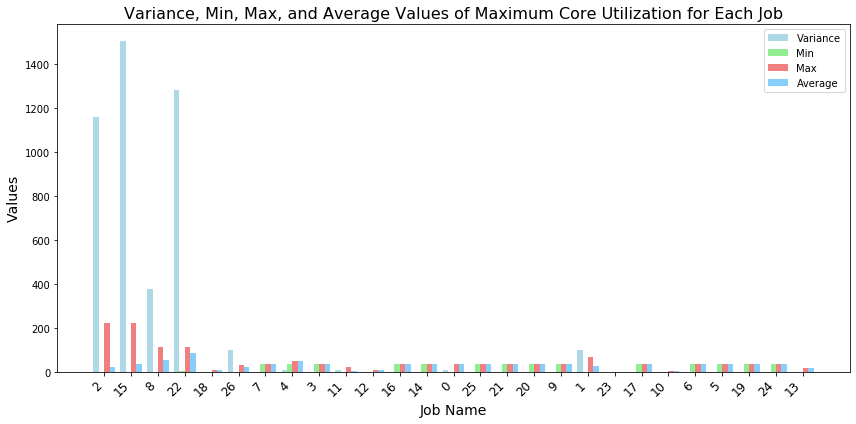

In [45]:
# Job Name Analysis

df_filtered = df[df['JobName'].map(df['JobName'].value_counts()) > 1000]

label_encoder = LabelEncoder()
df_filtered['JobNameEncoded'] = label_encoder.fit_transform(df_filtered['JobName'])

job_statistics = {}

#print(f"Job names and counts: \n{df_filtered['JobNameEncoded'].value_counts()}")
print(f"Total number of jobs >500: {df_filtered.shape[0]}")
      
for job_name in df_filtered['JobNameEncoded'].unique():
    job_data = df_filtered[df_filtered['JobNameEncoded'] == job_name]
    job_statistics[job_name] = {
        'Variance': job_data['max_cpu_node_usage'].var(),
        'Min': job_data['max_cpu_node_usage'].min(),
        'Max': job_data['max_cpu_node_usage'].max(),
        'Average': job_data['max_cpu_node_usage'].mean()
    }

# Step 4: Prepare data for plotting
job_names = [str(job) for job in job_statistics.keys()]  # Keep encoded job names as strings
variance_vals = [stats['Variance'] for stats in job_statistics.values()]
min_vals = [stats['Min'] for stats in job_statistics.values()]
max_vals = [stats['Max'] for stats in job_statistics.values()]
avg_vals = [stats['Average'] for stats in job_statistics.values()]

# Step 5: Set bar width and position
bar_width = 0.2
index = np.arange(len(job_names))

# Step 6: Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for each statistic
ax.bar(index - 1.5*bar_width, variance_vals, bar_width, label='Variance', color='lightblue')
ax.bar(index - 0.5*bar_width, min_vals, bar_width, label='Min', color='lightgreen')
ax.bar(index + 0.5*bar_width, max_vals, bar_width, label='Max', color='lightcoral')
ax.bar(index + 1.5*bar_width, avg_vals, bar_width, label='Average', color='lightskyblue')

# Labeling
ax.set_xlabel('Job Name', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Variance, Min, Max, and Average Values of Maximum Core Utilization for Each Job', fontsize=16)
ax.set_xticks(index)
ax.set_xticklabels(job_names, rotation=45, ha='right', fontsize=12)
ax.legend()

# Step 7: Show the plot
plt.tight_layout()
plt.show()
      

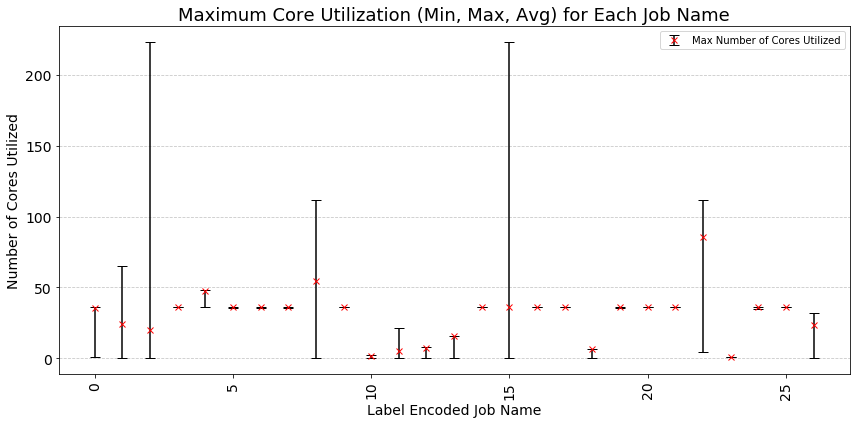

In [41]:
cpu_usage_stats = {}

for job_name, job_df in df_filtered.groupby('JobNameEncoded'):
    if not job_df.empty:
        mean_val = job_df['max_cpu_node_usage'].mean()
        min_val = job_df['max_cpu_node_usage'].min()
        max_val = job_df['max_cpu_node_usage'].max()
        cpu_usage_stats[job_name] = {'mean': mean_val, 'min': min_val, 'max': max_val, 'count': count}

job_names = list(cpu_usage_stats.keys())
means = [cpu_usage_stats[job]['mean'] for job in job_names]
mins = [cpu_usage_stats[job]['min'] for job in job_names]
maxs = [cpu_usage_stats[job]['max'] for job in job_names]


yerr = [
    [mean - min_val for mean, min_val in zip(means, mins)],  # Lower error (mean - min)
    [max_val - mean for mean, max_val in zip(means, maxs)]   # Upper error (max - mean)
]

plt.figure(figsize=(12, 6))
plt.errorbar(job_names, means, yerr=yerr, fmt='x', capsize=5, color='red', ecolor='black', label='Max Number of Cores Utilized')
plt.title('Maximum Core Utilization (Min, Max, Avg) for Each Job Name',fontsize=18)
plt.xlabel('Label Encoded Job Name',fontsize=14)
plt.ylabel('Number of Cores Utilized',fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=90, fontsize=14, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.legend()


plt.tight_layout()
plt.show()


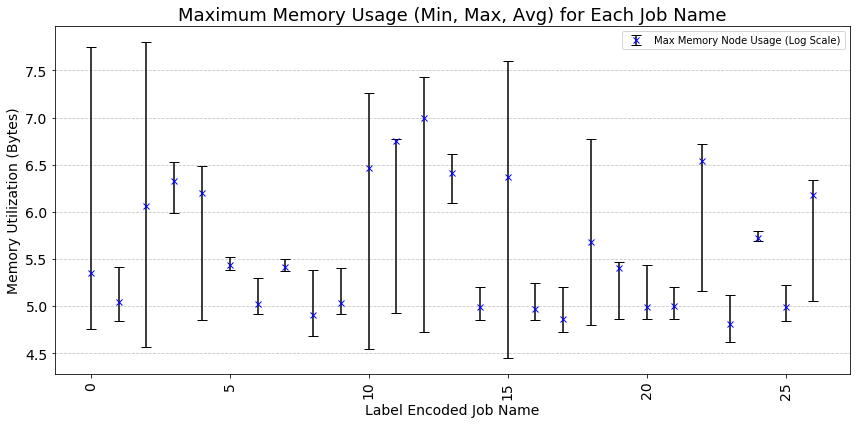

In [46]:
mem_usage_stats = {}

for job_name, job_df in df_filtered.groupby('JobNameEncoded'):
    if not job_df.empty:
        mean_val = job_df['max_mem_usage'].mean()
        min_val = job_df['max_mem_usage'].min()
        max_val = job_df['max_mem_usage'].max()
        mem_usage_stats[job_name] = {'mean': mean_val, 'min': min_val, 'max': max_val, 'count': count}

job_names = list(mem_usage_stats.keys())
means = [mem_usage_stats[job]['mean'] for job in job_names]
mins = [mem_usage_stats[job]['min'] for job in job_names]
maxs = [mem_usage_stats[job]['max'] for job in job_names]

yerr = [
    [mean - min_val for mean, min_val in zip(means, mins)],  # Lower error (mean - min)
    [max_val - mean for mean, max_val in zip(means, maxs)]   # Upper error (max - mean)
]

log_means = np.log10(means)
log_mins = np.log10(mins)
log_maxs = np.log10(maxs)

# Recalculate error bars after log transformation
log_yerr = [
    log_means - np.log10(mins),  # Lower error
    np.log10(maxs) - log_means   # Upper error
]

# Plot the error bar chart with log-transformed data
plt.figure(figsize=(12, 6))
plt.errorbar(job_names, log_means, yerr=log_yerr, fmt='x', capsize=5, color='blue', ecolor='black', label='Max Memory Node Usage (Log Scale)')
plt.title('Maximum Memory Usage (Min, Max, Avg) for Each Job Name', fontsize=18)
plt.xlabel('Label Encoded Job Name', fontsize=14)
plt.ylabel('Memory Utilization (Bytes)', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=90, fontsize=14, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


/project/peaclab-mon/monitoring_venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


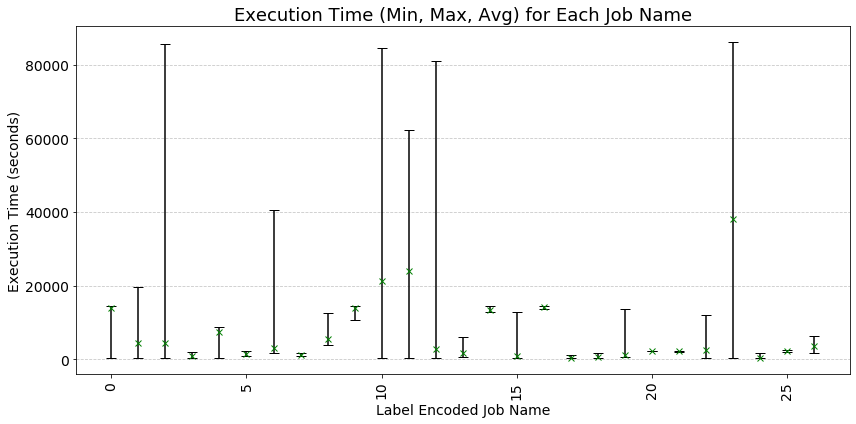

In [52]:
def convert_to_seconds(time_str):
    try:
        time_obj = datetime.strptime(time_str, "%H:%M:%S")
        return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    except ValueError:
        return None

df_filtered['exec_time'] = df_filtered['Elapsed.1'].apply(convert_to_seconds)

exec_time_stats = {}

for job_name, job_df in df_filtered.groupby('JobNameEncoded'):
    if not job_df.empty:
        mean_val = job_df['exec_time'].mean()
        min_val = job_df['exec_time'].min()
        max_val = job_df['exec_time'].max()
        exec_time_stats[job_name] = {'mean': mean_val, 'min': min_val, 'max': max_val, 'count': count}

job_names = list(mem_usage_stats.keys())
means = [exec_time_stats[job]['mean'] for job in job_names]
mins = [exec_time_stats[job]['min'] for job in job_names]
maxs = [exec_time_stats[job]['max'] for job in job_names]

yerr = [
    [mean - min_val for mean, min_val in zip(means, mins)],  # Lower error (mean - min)
    [max_val - mean for mean, max_val in zip(means, maxs)]   # Upper error (max - mean)
]


plt.figure(figsize=(12, 6))
plt.errorbar(job_names, means, yerr=yerr, fmt='x', capsize=5, color='green', ecolor='black', label='Execution Time (seconds)')
plt.title('Execution Time (Min, Max, Avg) for Each Job Name', fontsize=18)
plt.xlabel('Label Encoded Job Name', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=90, fontsize=14, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# cpu usage distribution graph

print("Max CPU Usage of jobs:")  
print(df['max_cpu_node_usage'].value_counts())


custom_bins = [0, 10, 20, 30, 40, 50, 75, 100, 125, 250]  # Define your ranges here

df['Usage_Range'] = pd.cut(df['max_cpu_node_usage'], bins=custom_bins)


range_counts = df.groupby('Usage_Range')['User'].count()

# Plot the results
plt.figure(figsize=(10, 6))
range_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Number of Users per Max CPU Usage Range', fontsize=14)
plt.xlabel('Max CPU Usage Range', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# cpu usage distribution graph

print("Max CPU Usage of jobs:")  
print(df['max_cpu_node_usage'].value_counts())

user_avg_usage = df.groupby('JobName')['max_cpu_node_usage'].mean().reset_index()

custom_bins = [0, 10, 20, 30, 40, 50, 75, 100, 125, 250]  # Define your ranges here

user_avg_usage['Usage_Range'] = pd.cut(user_avg_usage['max_cpu_node_usage'], bins=custom_bins)
range_counts = user_avg_usage.groupby('Usage_Range')['JobName'].count()


# Plot the results
plt.figure(figsize=(10, 6))
range_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Number of Jobs per Max CPU Usage Range', fontsize=14)
plt.xlabel('Max CPU Usage Range', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# memory usage distribution graph


print("Max Memory Usage of jobs:")  
print(df['max_mem_usage'].value_counts())


custom_bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000] 

df['Usage_Range'] = pd.cut(df['max_mem_usage'], bins=custom_bins)


range_counts = df.groupby('Usage_Range')['User'].count()

# Plot the results
plt.figure(figsize=(10, 6))
range_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Users per Max Memory Usage Range', fontsize=14)
plt.xlabel('Max Memory Usage', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# memory usage distribution graph

print("Max Memory Usage of jobs:")  
print(df['max_mem_usage'].value_counts())

user_avg_usage = df.groupby('JobName')['max_mem_usage'].mean().reset_index()

custom_bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000] 

user_avg_usage['Usage_Range'] = pd.cut(user_avg_usage['max_mem_usage'], bins=custom_bins)
range_counts = user_avg_usage.groupby('Usage_Range')['JobName'].count()



# Plot the results
plt.figure(figsize=(10, 6))
range_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Jobs per Max Memory Usage Range', fontsize=14)
plt.xlabel('Max Memory Usage', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Create different dataframes for different users

user_mapping = {user: f"User{idx+1}" for idx, user in enumerate(df['User'].unique())}

df['User'] = df['User'].map(user_mapping)

user_dataframes = {user: df[df['User'] == user] for user in df['User'].unique()}

for user, user_df in user_dataframes.items():
    print(f"DataFrame for User: {user}")
    print(f"Number of unique nodes requested: {user_df['NNodes'].nunique()}")
          
    max_cpu_std = user_df['max_cpu_node_usage'].std()
    max_cpu_range = user_df['max_cpu_node_usage'].max() - user_df['max_cpu_node_usage'].min()
    
    max_mem_std = user_df['max_mem_usage'].std()
    max_mem_range = user_df['max_mem_usage'].max() - user_df['max_mem_usage'].min()
    
    print(f"Max CPU Usage - Std Dev: {max_cpu_std:.2f}, Range: {max_cpu_range:.2f}")
    print(f"Max Memory Usage - Std Dev: {max_mem_std:.2f}, Range: {max_mem_range:.2f}")
    print("-" * 50)
    
    
    
    

In [ ]:
for user in df['User'].unique():
    user_data = df[df['User'] == user] 
    job_indices = range(1, len(user_data) + 1)
    
    
    plt.figure(figsize=(10, 6))
    plt.scatter(job_indices, user_data['mean_cpu_node_usage'], color='blue', label='Mean CPU Usage', alpha=0.7)
    plt.scatter(job_indices, user_data['max_cpu_node_usage'], color='red', label='Max CPU Usage', alpha=0.7)
    plt.title(f'CPU Usage Scatter Plot for User: {user}')
    plt.xlabel('Job Index')
    plt.ylabel('CPU Usage')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(job_indices, user_data['mean_mem_usage'], color='green', label='Mean Memory Usage', alpha=0.7)
    plt.scatter(job_indices, user_data['max_mem_usage'], color='orange', label='Max Memory Usage', alpha=0.7)
    plt.title(f'Memory Usage Scatter Plot for User: {user}')
    plt.xlabel('Job Index')
    plt.ylabel('Memory Usage')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [ ]:


for work_dir in df['WorkDir'].unique():
    work_dir_data = df[df['WorkDir'] == work_dir] 
    job_indices = range(1, len(work_dir_data) + 1)
    
    
    plt.figure(figsize=(10, 6))
    plt.scatter(job_indices, work_dir_data['mean_cpu_node_usage'], color='blue', label='Mean CPU Usage', alpha=0.7)
    plt.scatter(job_indices, work_dir_data['max_cpu_node_usage'], color='red', label='Max CPU Usage', alpha=0.7)
    plt.title(f'CPU Usage Scatter Plot for Working Directory: {work_dir}')
    plt.xlabel('Job Index')
    plt.ylabel('CPU Usage')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(job_indices, work_dir_data['mean_mem_usage'], color='green', label='Mean Memory Usage', alpha=0.7)
    plt.scatter(job_indices, work_dir_data['max_mem_usage'], color='orange', label='Max Memory Usage', alpha=0.7)
    plt.title(f'Memory Usage Scatter Plot for Working Directory: {work_dir}')
    plt.xlabel('Job Index')
    plt.ylabel('Memory Usage')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

In [ ]:
## WORKING DIRECTORY INFO along wih the USER NAME CAN BE USEFULLLL!!!